## Time series analysis on Hundsalm Eishöle temperature data
#### Author: Tanguy Racine
#### Date: Tuesday 23 October 2018


**A little introduction to the cave**

M17 is located on the Migovec Plateau.

### Survey and new logger placement
As of the 8th of August 2018, 2  bluetooth Hobo data loggers (with internal sensors) were installed in the ice rink chamber of the cave (see survey to be produced soon).


First, we import pandas, numpy and matplotlib modules into the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as date
from math import pi

Second, we save each excel tab as a different csv file and import each csv file under a different name. We use Pandas dataframes to store the data within the jupyter notebook. 

We then take care to index the dataframes with the datetime column to take advantage of the time series analysis capabilities of the pandas dataframe.

In [27]:
logger1 = pd.read_csv("2018_10_19/SN 20440473 2018_10_19.csv",skiprows=[0,1], index_col = 'Date Time - GMT +01:00', parse_dates = True, usecols = [0,1,2,3])
logger2 = pd.read_csv("2018_10_19/SN 20440475 2018_10_19.csv",skiprows=[0,1], index_col = 'Date Time - GMT +01:00',parse_dates = True, usecols = [0,1,2,3])

In [28]:
logger2['2018-08-15']

,"Temp, (*C)","RH, (%)","DewPt, (*C)"
Date Time - GMT +01:00,,,
2018-08-15 00:56:58,0.21,99.98,0.20
2018-08-15 01:56:58,0.21,99.98,0.20
2018-08-15 02:56:58,0.17,99.98,0.16
2018-08-15 03:56:58,0.17,99.98,0.16
2018-08-15 04:56:58,0.17,99.98,0.16
2018-08-15 05:56:58,0.21,99.98,0.20
2018-08-15 06:56:58,0.17,99.98,0.16
2018-08-15 07:56:58,0.21,99.98,0.20
2018-08-15 08:56:58,0.17,99.98,0.16


Now, to automate much of the rest of the plotting, it would be useful to pass a function through a dictionary associating the dataframes with their titles.

In [19]:
def tempPlotter(mypd,params):
    fig, ax = plt.subplots(figsize = params['plot_dims'])
    
    dat = mypd[params['Series']][params['start']:params['end']]

    ax.set_title(params['Title'])
    ax.plot(dat, color='black', lw = 0.5, alpha = 0.5)
    ax.fill_between(dat.index, dat, 0, where=dat>=0, color='#ff8080', lw = 0.5, alpha = 0.5)
    ax.fill_between(dat.index, dat, 0, where=dat<=0, color='#004d99', lw = 0.5, alpha = 0.5)
    ax.axhline(0, color='black', lw=0.5)
    ax.legend(loc = 0)

    ax.set(xlabel = 'Time', ylabel = 'Temperature $\degree$ C')
    plt.savefig('fig/'+params['start']+'_'+params['end']+'_'+params['filename'], dpi = 300)

    plt.show()

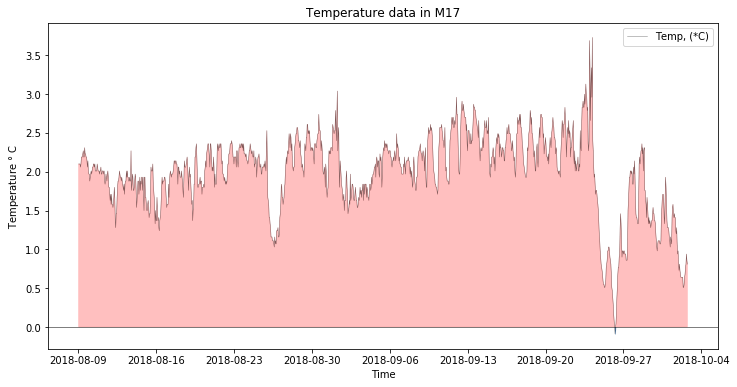

In [31]:
plot1 = {
    'filename':'temp_M17_1',
    'Title' : 'Temperature data in M17' , #a string needed for the title
    'plot_dims' : (12,6), #needs to be a tuple
    'Series' : 'Temp, (*C)', # this needs to be a string
    'start' :'2018-08-09', # again a string for start and end dates
    'end' : '2018-10-02'
}

tempPlotter(logger1,plot1)

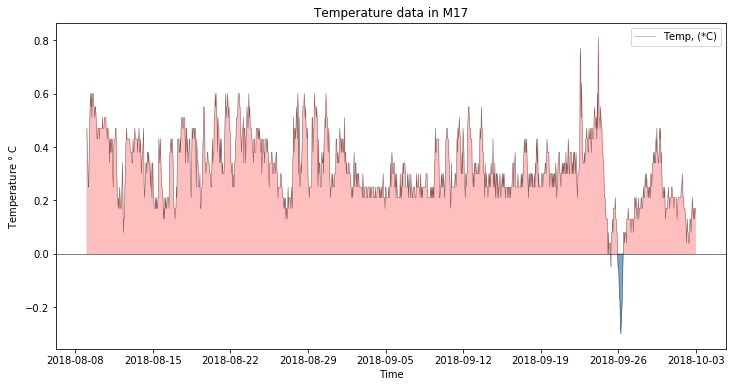

In [32]:
plot2 = {
    'filename':'temp_M17_2',
    'Title' : 'Temperature data in M17' , #a string needed for the title
    'plot_dims' : (12,6), #needs to be a tuple
    'Series' : 'Temp, (*C)', # this needs to be a string
    'start' :'2018-08-09', # again a string for start and end dates
    'end' : '2018-10-02'
}

tempPlotter(logger2,plot2)